#**Project Overview**
---
This project's objective is to analyze patterns in traffic congestion, and based on this pattern, create a model that would be able to reliably identify said traffic congestion.

https://drive.google.com/file/d/1jHkNqPwGuhY0GNQERkPs0BZcxKDHQIP1/view?usp=sharing

note: in order to make it easier to extract, it is decided that the data would be placed inside github

#**Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, RFECV
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

#**Data Loading**
---

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/Traffic_Congestion_DA.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


#**Exploratory Data Analysis - EDA**
---

##**1. Data Description**
---

###a. Data Type Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


###b. Descriptive Statistics

In [4]:
df.describe(include='all')

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976
unique,96,NaN,7,NaN,NaN,NaN,NaN,NaN,4
top,12:00:00 AM,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,normal
freq,31,NaN,480,NaN,NaN,NaN,NaN,NaN,1669
mean,NaN,16.000000,NaN,68.696573,14.917339,15.279570,15.324933,114.218414,NaN
std,NaN,8.945775,NaN,45.850693,12.847518,14.341986,10.603833,60.190627,NaN
min,NaN,1.000000,NaN,6.000000,0.000000,0.000000,0.000000,21.000000,NaN
25%,NaN,8.000000,NaN,19.000000,5.000000,1.000000,6.000000,55.000000,NaN
50%,NaN,16.000000,NaN,64.000000,12.000000,12.000000,14.000000,109.000000,NaN
75%,NaN,24.000000,NaN,107.000000,22.000000,25.000000,23.000000,164.000000,NaN


##**2. Duplicate Data Detection**
---

In [5]:
df.duplicated().sum()

np.int64(0)

##**3. Data Distribution**
---

###a. Numeric Data

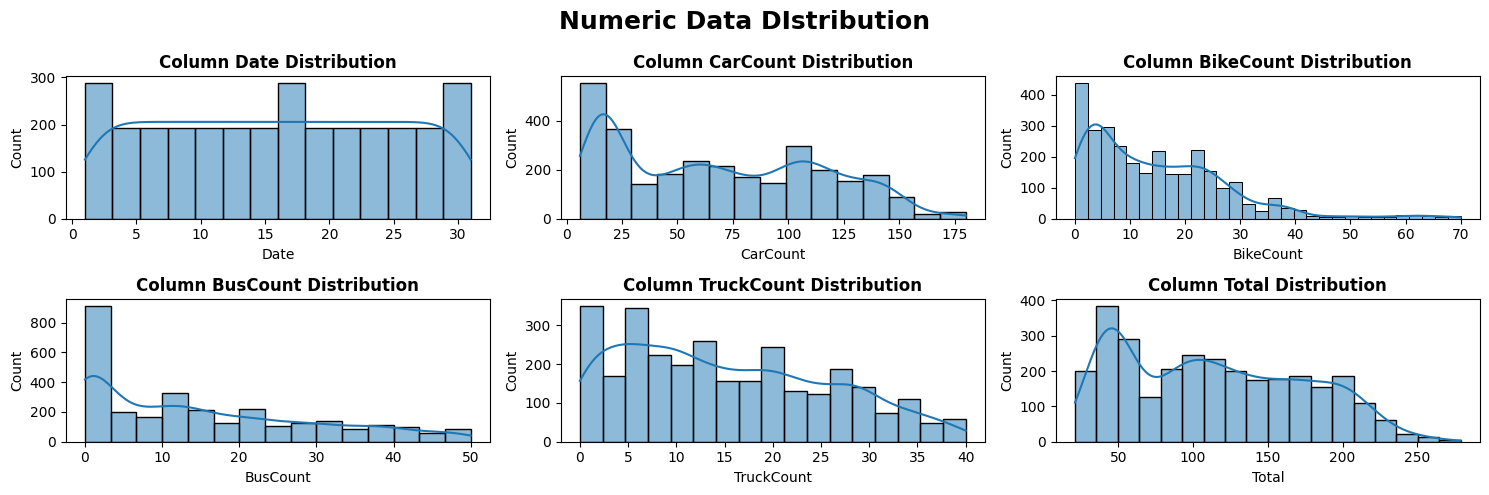

In [6]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric.columns):
  plt.subplot(2, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Column {col} Distribution', fontsize=12, fontweight='bold')
plt.suptitle('Numeric Data DIstribution', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

###b. Categorical Data

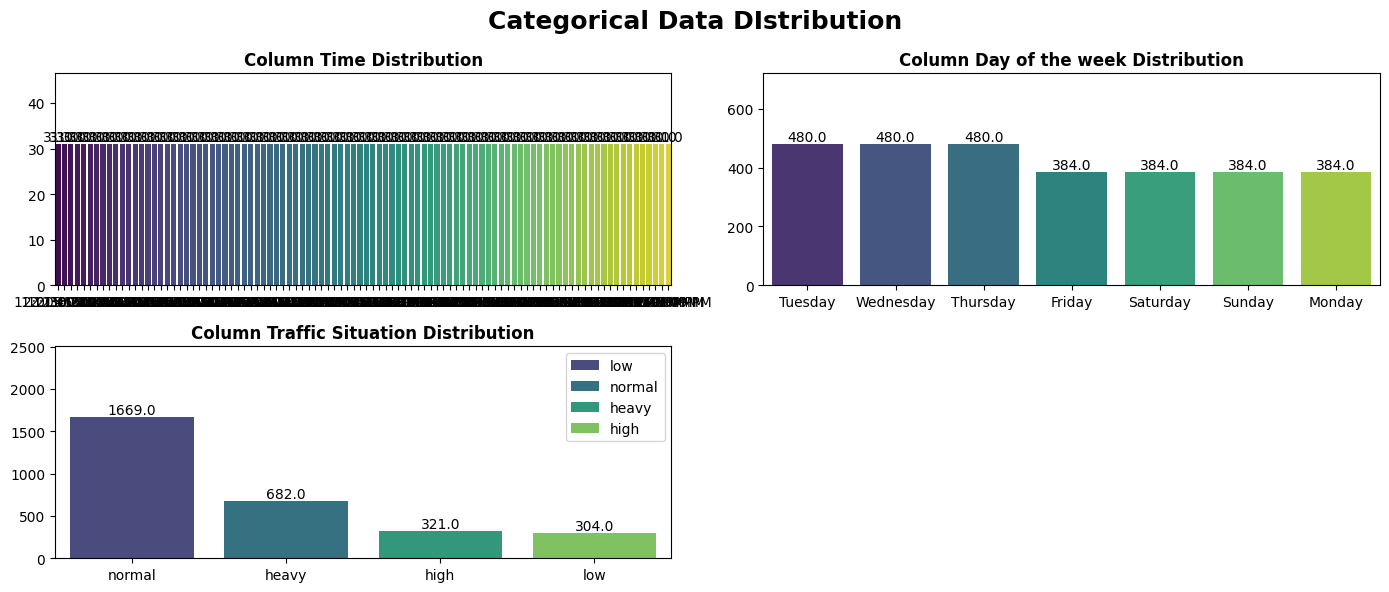

In [7]:
categorical = df.select_dtypes(include='object')

plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical.columns):
  plt.subplot(2, 2, i+1)
  counts = df[col].value_counts()
  ax = sns.barplot(x=counts.index.tolist(), y=counts.values.tolist(), hue=df[col].unique(), palette='viridis')
  for value in ax.containers:
    label = [val.get_height() for val in value]
    ax.bar_label(value, labels=label, label_type='edge')
  plt.title(f'Column {col} Distribution', fontsize=12, fontweight='bold')
  plt.ylim(ymax=counts.max() + (counts.max() / 2))
plt.suptitle('Categorical Data DIstribution', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

##**3. Outlier Detection**
---

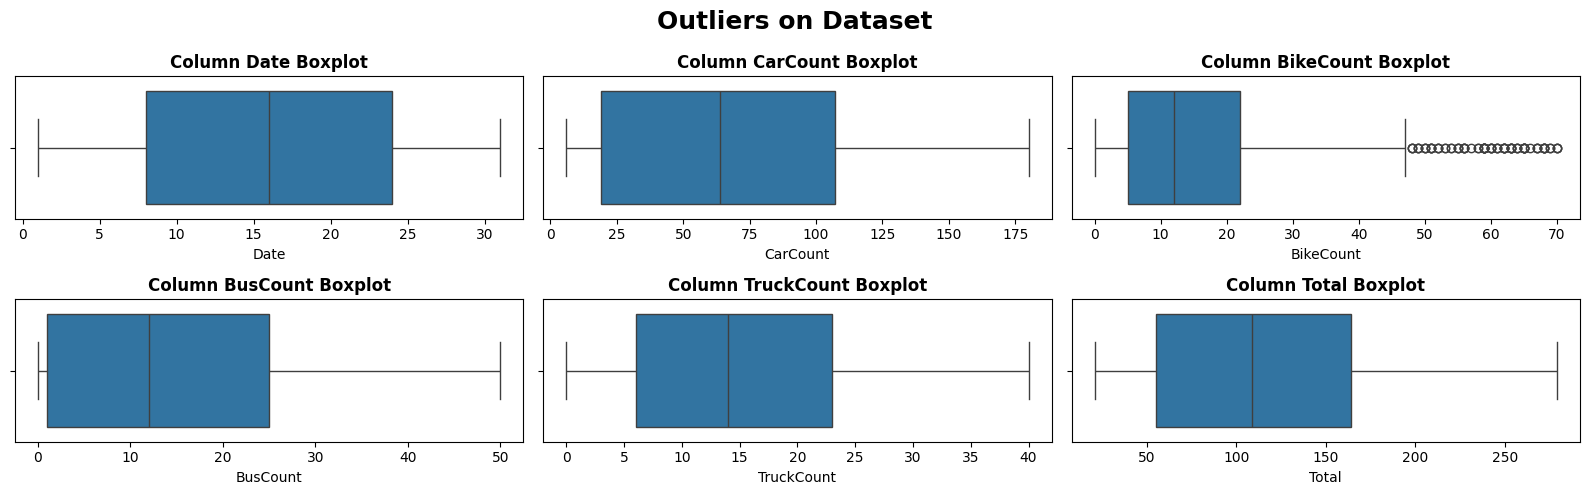

In [8]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(16, 5))
for i, col in enumerate(numeric.columns):
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Column {col} Boxplot', fontsize=12, fontweight='bold')
plt.suptitle('Outliers on Dataset', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

##**4. Correlation Analysis**
---

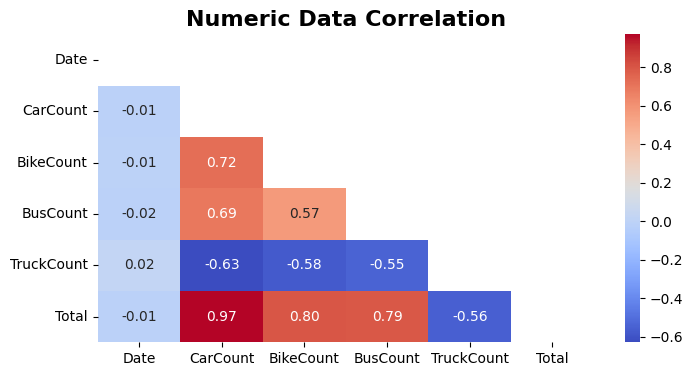

In [9]:
numeric = df.select_dtypes(include='number')
corr = numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=float))

plt.figure(figsize=(8, 4))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric Data Correlation', fontsize=16, fontweight='bold')
plt.show()

In [10]:
'''plt.figure(figsize=(22, 22))
sns.pairplot(df)
plt.show()'''

'plt.figure(figsize=(22, 22))\nsns.pairplot(df)\nplt.show()'

##**5. Comparisson Between Categories**
---

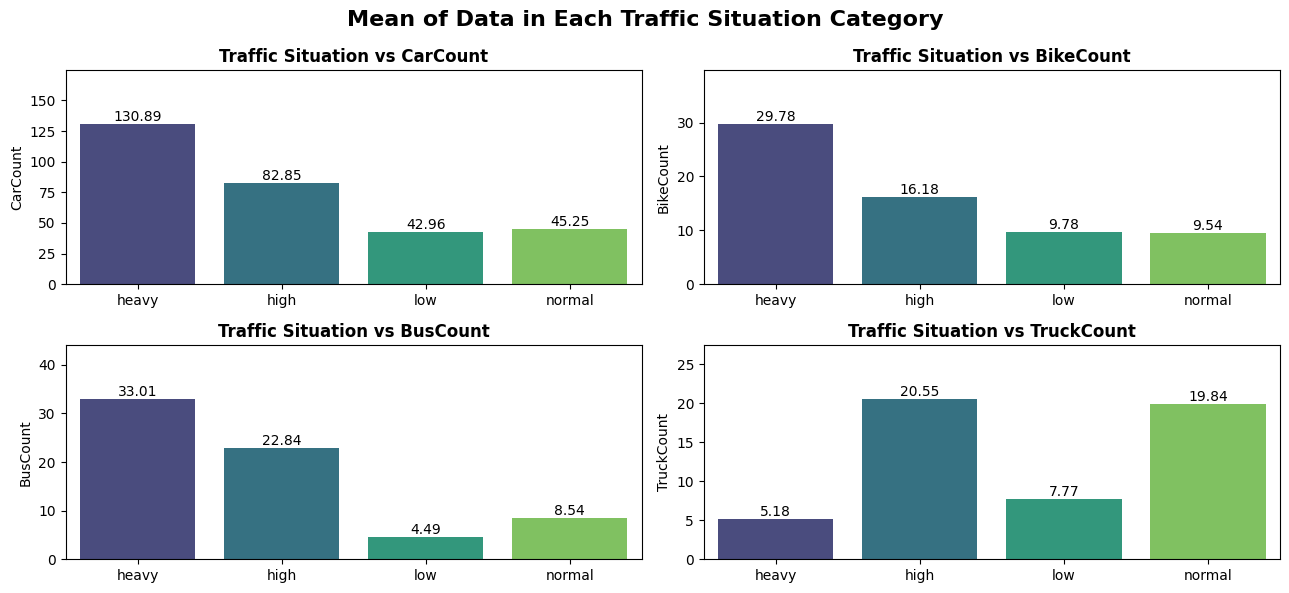

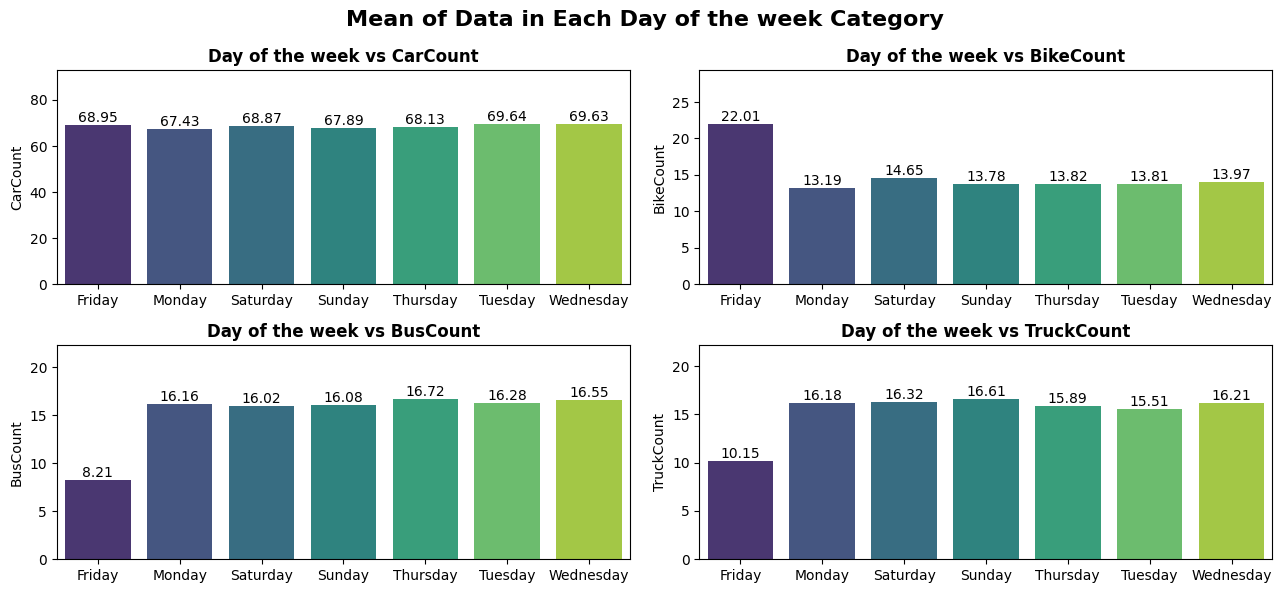

In [11]:
cat = ['Traffic Situation', 'Day of the week']

for column in cat:
  df_agg = df.groupby(by=column).agg({
      'CarCount': 'mean',
      'BikeCount': 'mean',
      'BusCount': 'mean',
      'TruckCount': 'mean'
  })
  plt.figure(figsize=(13, 6))
  for i, col in enumerate(df_agg.columns):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(x=df_agg.index.tolist(), y=df_agg[col], hue=df_agg.index.tolist(), palette='viridis')
    for value in ax.containers:
      label=[round(val.get_height(), 2) for val in value]
      ax.bar_label(value, labels=label, label_type='edge')
    plt.title(f'{column} vs {col}', fontsize=12, fontweight='bold')
    plt.ylim(ymax=df_agg[col].max() + (df_agg[col].max() / 3))
  plt.suptitle(f'Mean of Data in Each {column} Category', fontsize=16, fontweight='bold')
  plt.tight_layout()
  plt.show()
  print(' ')

##**6. Comparisson Between Days**
---

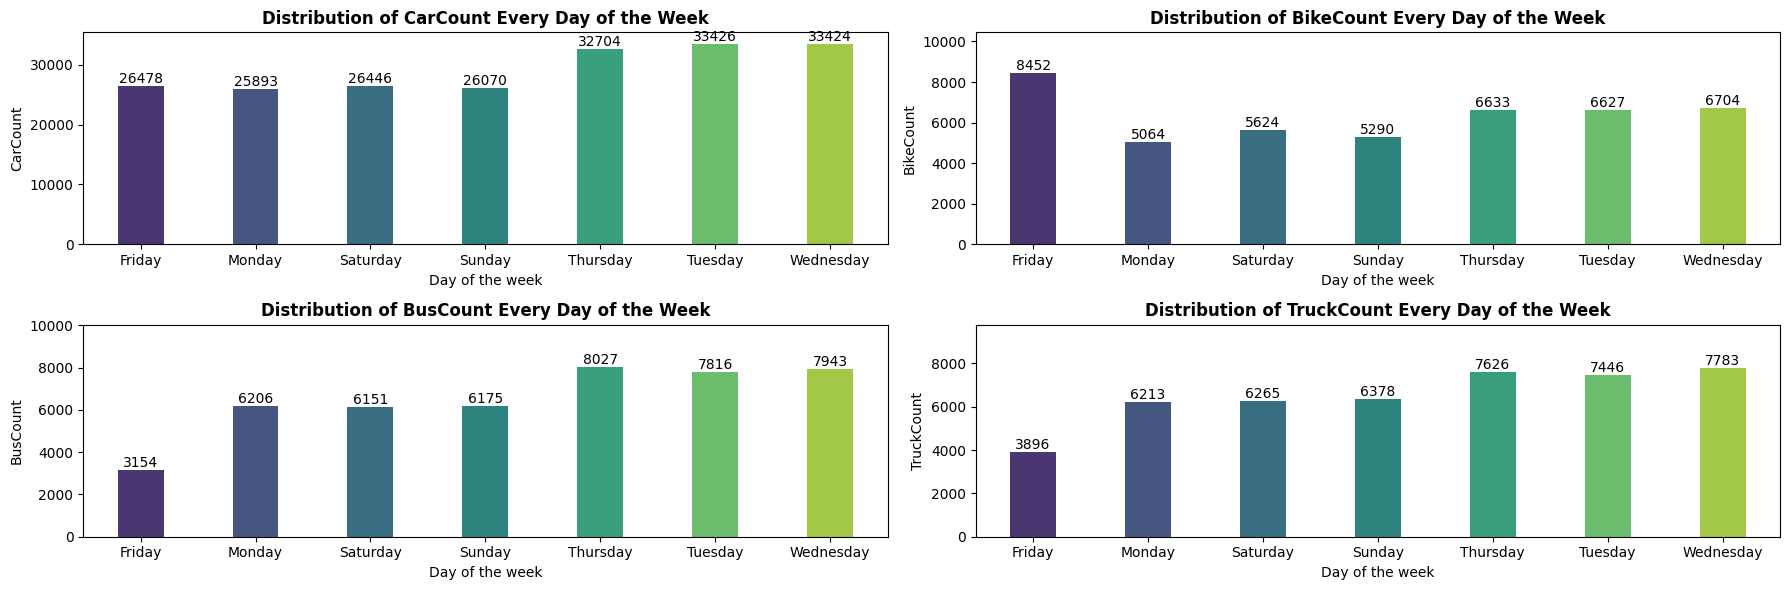

In [12]:
df_day = df.groupby(by='Day of the week').agg({
  'CarCount': 'sum',
  'BikeCount': 'sum',
  'BusCount': 'sum',
  'TruckCount': 'sum'
})

plt.figure(figsize=(18,6))
for i, col in enumerate(df_day.columns):
  plt.subplot(2, 2, i+1)
  ax = sns.barplot(x=df_day.index, y=df_day[col], hue=df_day.index, palette='viridis', gap=0.5, legend=False)
  for value in ax.containers:
    label=[val.get_height() for val in value]
    ax.bar_label(value, label=label, label_type='edge')
  plt.title(f'Distribution of {col} Every Day of the Week', fontsize=12, fontweight='bold')
  plt.ylim(ymax=df_day[col].max() + 2000)
plt.tight_layout()
plt.show()

#**Data Preparation**
---

##**1. Data Type Conversion**
---

In [13]:
df.head(2)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low


In [14]:
date = [val for val in df['Date']]
time = [time for time in df['Time']]
result = []

for i in range(len(date)):
  result.append(f'{date[i]}/10/2025 {time[i]}')

df['Date_agg'] = result
df['Date_agg'] = pd.to_datetime(df['Date_agg'])
df.head()

/tmp/ipython-input-2600202203.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_agg'] = pd.to_datetime(df['Date_agg'])


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Date_agg
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,2025-10-10 00:00:00
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,2025-10-10 00:15:00
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,2025-10-10 00:30:00
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,2025-10-10 00:45:00
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,2025-10-10 01:00:00


##**2. Data Encoding**
---

###a. Encoding Day of the Week

In [15]:
df_new = pd.get_dummies(df, columns=['Day of the week'], drop_first=True, dtype=int)
df_new.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Date_agg,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,12:00:00 AM,10,31,0,4,4,39,low,2025-10-10 00:00:00,0,0,0,0,1,0
1,12:15:00 AM,10,49,0,3,3,55,low,2025-10-10 00:15:00,0,0,0,0,1,0
2,12:30:00 AM,10,46,0,3,6,55,low,2025-10-10 00:30:00,0,0,0,0,1,0
3,12:45:00 AM,10,51,0,2,5,58,low,2025-10-10 00:45:00,0,0,0,0,1,0
4,1:00:00 AM,10,57,6,15,16,94,normal,2025-10-10 01:00:00,0,0,0,0,1,0


###b. Encoding Traffic Situation

In [16]:
def encode_situation(data):
  if data == 'low':
    return 0
  elif data == 'normal':
    return 1
  elif data == 'high':
    return 2
  elif data == 'heavy':
    return 3

df_new['Situation_Encoded'] = df_new['Traffic Situation'].apply(encode_situation)
df_new.drop(columns=['Traffic Situation', 'Total'], inplace=True)
df_new.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Date_agg,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Situation_Encoded
0,12:00:00 AM,10,31,0,4,4,2025-10-10 00:00:00,0,0,0,0,1,0,0
1,12:15:00 AM,10,49,0,3,3,2025-10-10 00:15:00,0,0,0,0,1,0,0
2,12:30:00 AM,10,46,0,3,6,2025-10-10 00:30:00,0,0,0,0,1,0,0
3,12:45:00 AM,10,51,0,2,5,2025-10-10 00:45:00,0,0,0,0,1,0,0
4,1:00:00 AM,10,57,6,15,16,2025-10-10 01:00:00,0,0,0,0,1,0,1


##**2. Feature Selection**
---

In [17]:
df_new['Time'] = pd.to_datetime(df_new['Time']).dt.hour

feature_input = [col for col in df_new.columns if col not in ['Situation_Encoded', 'Date_agg']]
feature_target = ['Situation_Encoded']

/tmp/ipython-input-2178431062.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['Time'] = pd.to_datetime(df_new['Time']).dt.hour


In [18]:
df_new['Time'].value_counts()

,count
Time,
0,124
1,124
2,124
3,124
4,124
5,124
6,124
7,124
8,124


###a. Select K-Best

In [19]:
selector = SelectKBest(score_func=chi2, k=4)
selector.fit(df_new[feature_input], df_new[feature_target])

score_df = pd.DataFrame({
    'score': selector.scores_
}, index=feature_input).sort_values(by='score', ascending=False)
score_df

,score
CarCount,55622.239959
BusCount,22513.374994
BikeCount,13903.268543
TruckCount,8505.486955
Time,538.050074
Day of the week_Sunday,14.021425
Day of the week_Wednesday,8.838886
Day of the week_Saturday,8.467419
Date,7.712852
Day of the week_Thursday,7.310727


In [20]:
cols_skbest = score_df.head(4).index.tolist()

###b. RFECV - Recursive Feature Elimination with Cross-Validation

In [21]:
rf = RandomForestClassifier()

selector = RFECV(
    estimator=rf,
    step=1,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
selector.fit(df_new[feature_input], df_new[feature_target])

result_df = pd.DataFrame({
    'use_feature': selector.support_
}, index=feature_input).sort_values(by='use_feature', ascending=False)
result_df

Fitting estimator with 12 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 11 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 10 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 9 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 8 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 7 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 6 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 5 features.


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,use_feature
CarCount,True
BikeCount,True
BusCount,True
TruckCount,True
Time,False
Date,False
Day of the week_Monday,False
Day of the week_Saturday,False
Day of the week_Sunday,False
Day of the week_Thursday,False


In [22]:
cols_rfecv = result_df[result_df['use_feature'] == True].index.tolist()

##**3. Data Splitting & Undersampling**
---

In [23]:
x = df_new[cols_rfecv]
y = df_new['Situation_Encoded']

rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)

print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Situation_Encoded
0    304
1    304
2    304
3    304
Name: count, dtype: int64


##**4. Data Normalization**
---

In [24]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_nml = normalizer.transform(x_train)
x_test_nml = normalizer.transform(x_test)

#**Data Modelling**
---

##**1. Naive Bayes Classifier**
---

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        62
           1       0.90      0.65      0.75        71
           2       0.64      0.82      0.72        55
           3       0.90      0.96      0.93        56

    accuracy                           0.84       244
   macro avg       0.85      0.85      0.84       244
weighted avg       0.86      0.84      0.84       244



Text(0.5, 1.0, 'Confusion Matrix - Gaussian Naive Bayes')

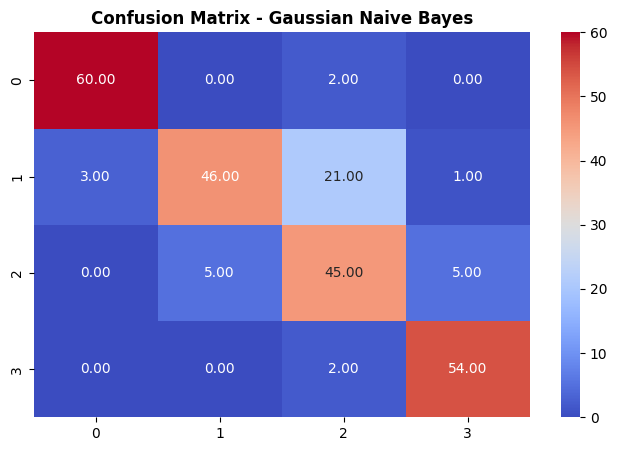

In [25]:
gnb = GaussianNB()
gnb.fit(x_train_nml, y_train)

y_pred = gnb.predict(x_test_nml)
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix - Gaussian Naive Bayes', fontsize=12, fontweight='bold')

##**2. Support Vector Classifier**
---

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.95      0.86      0.90        71
           2       0.85      0.96      0.91        55
           3       0.98      0.95      0.96        56

    accuracy                           0.93       244
   macro avg       0.94      0.94      0.94       244
weighted avg       0.94      0.93      0.93       244



Text(0.5, 1.0, 'Confusion Matrix - SVC')

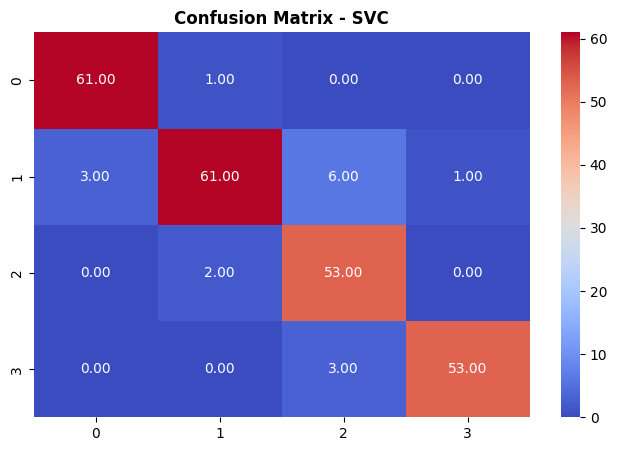

In [26]:
svc = SVC(kernel='rbf')
svc.fit(x_train_nml, y_train)

y_pred = svc.predict(x_test_nml)
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix - SVC', fontsize=12, fontweight='bold')

##**3. Random Forest Classifier**
---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.99      0.97      0.98        71
           2       0.98      0.98      0.98        55
           3       0.96      0.98      0.97        56

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

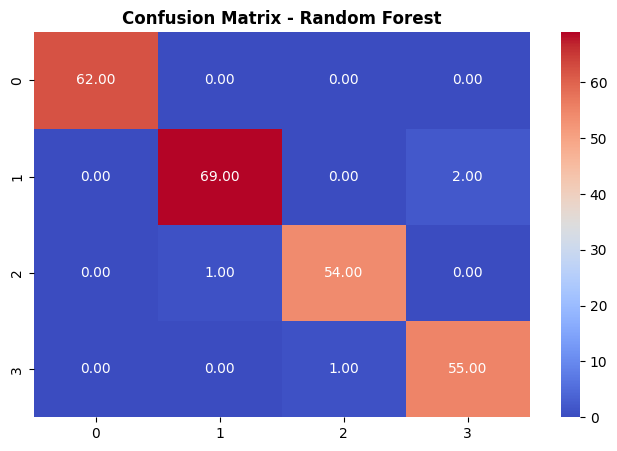

In [27]:
rfc = RandomForestClassifier()
rfc.fit(x_train_nml, y_train)

y_pred = rfc.predict(x_test_nml)
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Confusion Matrix - Random Forest', fontsize=12, fontweight='bold')

##**4. Data Clustering**
---

In [28]:
df_cl = df.copy()
df_cl.drop(columns=['Traffic Situation', 'Total', 'Date_agg'], inplace=True)

df_cl = pd.get_dummies(df_cl, columns=['Day of the week'], drop_first=True, dtype=int)
df_cl['Time'] = pd.to_datetime(df_cl['Time']).dt.hour

/tmp/ipython-input-623850678.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cl['Time'] = pd.to_datetime(df_cl['Time']).dt.hour


###a. Feature Selection

In [29]:
n_clusters = range(2, 10)
result_slc = []

for cluster in n_clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=42)
  kmeans.fit(df_cl)
  label = kmeans.labels_

  selector = SelectKBest(score_func=chi2, k=4)
  selector.fit(df_cl, label)
  scores = pd.DataFrame({
      'score': selector.scores_
  }, index=df_cl.columns.tolist()).sort_values(by='score', ascending=False)
  result_slc.append(scores)

  print(f'Results with {cluster} clusters:')
  display(scores)
  print(' ')

Results with 2 clusters:


,score
CarCount,69991.329078
BusCount,15352.050678
BikeCount,11196.570789
TruckCount,6282.368871
Time,200.059485
Date,9.301439
Day of the week_Wednesday,3.668006
Day of the week_Saturday,0.337518
Day of the week_Thursday,0.285664
Day of the week_Tuesday,0.195742


 
Results with 3 clusters:


,score
CarCount,81379.956429
BusCount,21318.778392
BikeCount,15590.461779
TruckCount,8766.253465
Time,697.166917
Date,15.499872
Day of the week_Tuesday,1.324538
Day of the week_Sunday,1.258468
Day of the week_Thursday,1.201684
Day of the week_Wednesday,0.400680


 
Results with 4 clusters:


,score
CarCount,85833.477625
BusCount,21540.546893
BikeCount,17295.916196
TruckCount,8871.026320
Time,739.719678
Date,18.545930
Day of the week_Wednesday,7.787516
Day of the week_Thursday,4.477288
Day of the week_Tuesday,2.262418
Day of the week_Sunday,1.923587


 
Results with 5 clusters:


,score
CarCount,87254.049500
BusCount,22363.684871
BikeCount,17966.449770
TruckCount,9203.557246
Time,830.580673
Date,32.593366
Day of the week_Tuesday,8.453175
Day of the week_Wednesday,5.826093
Day of the week_Sunday,4.562908
Day of the week_Thursday,3.112989


 
Results with 6 clusters:


,score
CarCount,87262.036924
BusCount,25679.896036
BikeCount,18407.183193
TruckCount,9704.678956
Time,5975.263804
Date,33.510609
Day of the week_Wednesday,12.224312
Day of the week_Tuesday,11.037085
Day of the week_Sunday,6.559271
Day of the week_Monday,4.454663


 
Results with 7 clusters:


,score
CarCount,86948.024853
BusCount,27797.974880
BikeCount,22995.032739
TruckCount,9910.625112
Time,7095.055385
Date,26.856794
Day of the week_Wednesday,26.724697
Day of the week_Thursday,21.310592
Day of the week_Tuesday,15.288658
Day of the week_Monday,13.981603


 
Results with 8 clusters:


,score
CarCount,88213.579093
BusCount,28239.965867
BikeCount,23334.840316
TruckCount,13123.005187
Time,922.799813
Date,81.615366
Day of the week_Wednesday,33.616977
Day of the week_Tuesday,21.461294
Day of the week_Sunday,21.079237
Day of the week_Thursday,20.728577


 
Results with 9 clusters:


,score
CarCount,88100.380466
BusCount,28638.622200
BikeCount,23405.577373
TruckCount,12113.483728
Time,7088.916172
Date,91.648307
Day of the week_Wednesday,29.069412
Day of the week_Tuesday,22.422654
Day of the week_Thursday,21.865099
Day of the week_Sunday,20.068309


In [30]:
n_clusters = range(2, 10)
result_perm = []

for cluster in n_clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=42)
  kmeans.fit(df_cl)
  label = kmeans.labels_

  selector = permutation_importance(kmeans, df_cl, label, n_repeats=100, random_state=42)
  scores = pd.DataFrame({
      'score': [round(val, 2) for val in selector['importances_mean'].tolist()]
  }, index=df_cl.columns.tolist()).sort_values(by='score', ascending=False)
  result_perm.append(scores)

  print(f'Results with {cluster} clusters:')
  display(scores)
  print(' ')

Results with 2 clusters:


,score
CarCount,940374.78
BusCount,449425.06
BikeCount,323680.52
TruckCount,188224.85
Time,4591.12
Date,272.56
Day of the week_Wednesday,1.24
Day of the week_Thursday,0.11
Day of the week_Saturday,0.08
Day of the week_Tuesday,0.04


 
Results with 3 clusters:


,score
CarCount,1284010.35
BusCount,620963.18
BikeCount,449741.12
TruckCount,261877.42
Time,15898.66
Date,429.27
Day of the week_Thursday,0.41
Day of the week_Sunday,0.35
Day of the week_Tuesday,0.33
Day of the week_Wednesday,0.13


 
Results with 4 clusters:


,score
CarCount,1254208.93
BusCount,601569.29
BikeCount,482792.97
TruckCount,262283.77
Time,16701.06
Date,403.68
Day of the week_Wednesday,2.54
Day of the week_Thursday,1.33
Day of the week_Tuesday,0.65
Day of the week_Sunday,0.52


 
Results with 5 clusters:


,score
CarCount,1211931.97
BusCount,623537.18
BikeCount,502127.93
TruckCount,272072.44
Time,18719.28
Date,735.57
Day of the week_Tuesday,2.72
Day of the week_Wednesday,1.90
Day of the week_Sunday,1.22
Day of the week_Thursday,0.91


 
Results with 6 clusters:


,score
CarCount,1240368.38
BusCount,644229.14
BikeCount,521074.46
TruckCount,290724.32
Time,67806.97
Date,868.05
Day of the week_Wednesday,4.05
Day of the week_Tuesday,3.57
Day of the week_Sunday,1.61
Day of the week_Monday,1.23


 
Results with 7 clusters:


,score
CarCount,1264396.93
BusCount,639904.86
BikeCount,584801.71
TruckCount,291718.99
Time,68296.16
Date,637.13
Day of the week_Wednesday,8.76
Day of the week_Thursday,6.67
Day of the week_Tuesday,4.97
Day of the week_Monday,3.64


 
Results with 8 clusters:


,score
CarCount,1198896.73
BusCount,661081.14
BikeCount,557017.41
TruckCount,246059.27
Time,19884.79
Date,1526.62
Day of the week_Wednesday,11.02
Day of the week_Tuesday,7.05
Day of the week_Thursday,6.58
Day of the week_Sunday,5.63


 
Results with 9 clusters:


,score
CarCount,1209773.82
BusCount,664674.12
BikeCount,560113.03
TruckCount,265639.90
Time,71318.11
Date,1103.16
Day of the week_Wednesday,9.43
Day of the week_Tuesday,7.37
Day of the week_Thursday,6.92
Day of the week_Sunday,5.29


In [31]:
cols_selected = result_slc[2].head(5).index.tolist()
print(cols_selected)

['CarCount', 'BusCount', 'BikeCount', 'TruckCount', 'Time']


###b. K-Means Clustering

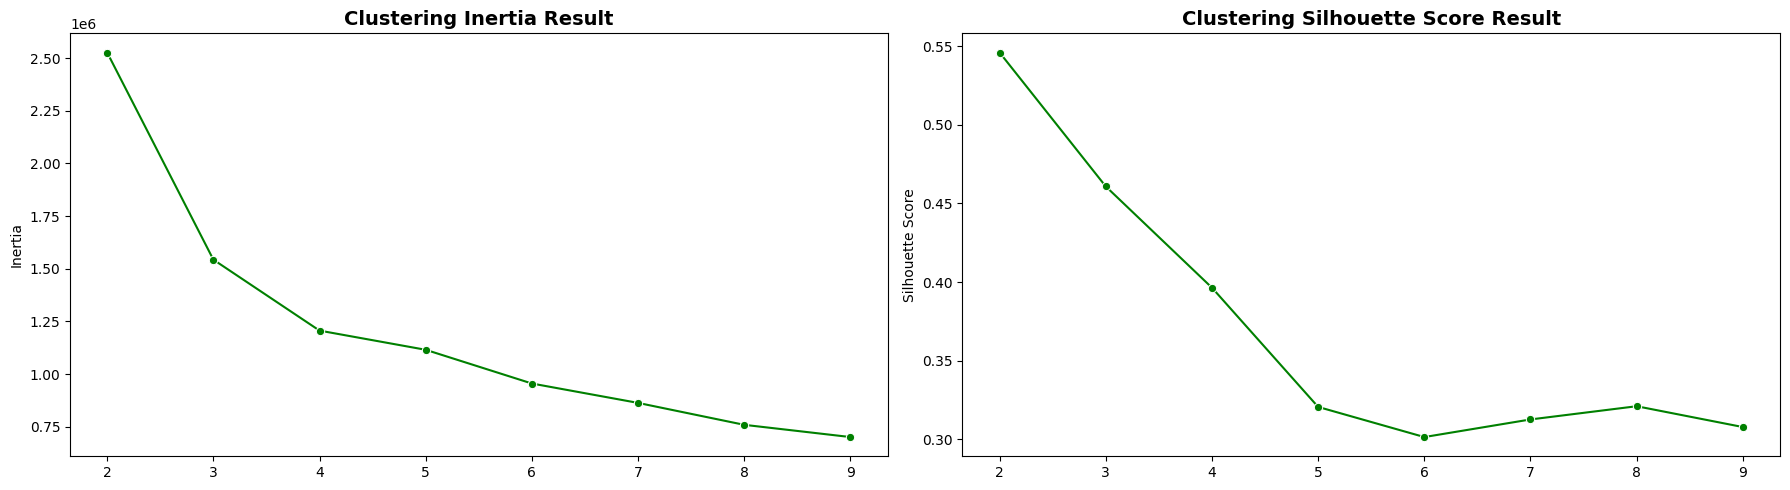

In [32]:
inertia, sil_score = [], []
n_clusters = range(2, 10)
df_cl = df_cl[cols_selected]


for cl in n_clusters:
  kmeans = KMeans(n_clusters=cl, random_state=42)
  kmeans.fit(df_cl)
  label = kmeans.labels_

  inertia.append(kmeans.inertia_)
  sil_score.append(silhouette_score(df_cl, label, metric='euclidean'))

df_result = pd.DataFrame({
    'Inertia': inertia,
    'Silhouette Score': sil_score
}, index=n_clusters)

plt.figure(figsize=(18, 5))
for i, col in enumerate(df_result):
  plt.subplot(1, 2, i+1)
  sns.lineplot(x=df_result.index.tolist(), y=df_result[col], color='green', marker='o')
  plt.title(f'Clustering {col} Result', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_cl)
label = kmeans.labels_

silhouette = silhouette_score(df_cl, label, metric='euclidean')
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.4608251288414787


In [34]:
df_cl['cluster'] = kmeans.fit_predict(df_cl)

df['Time'] = pd.to_datetime(df['Time']).dt.hour
df['cluster'] = kmeans.fit_predict(df[cols_selected])

/tmp/ipython-input-999815103.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


#**Clustering Results**
---

##**1. General Summary**
---

In [35]:
df_cl_agg = df_cl.groupby(by='cluster').median()
df_cl_agg

,CarCount,BusCount,BikeCount,TruckCount,Time
cluster,,,,,
0,70.0,13.0,15.0,16.0,14.0
1,123.0,30.0,24.0,5.0,12.0
2,18.0,1.0,4.0,22.0,9.0


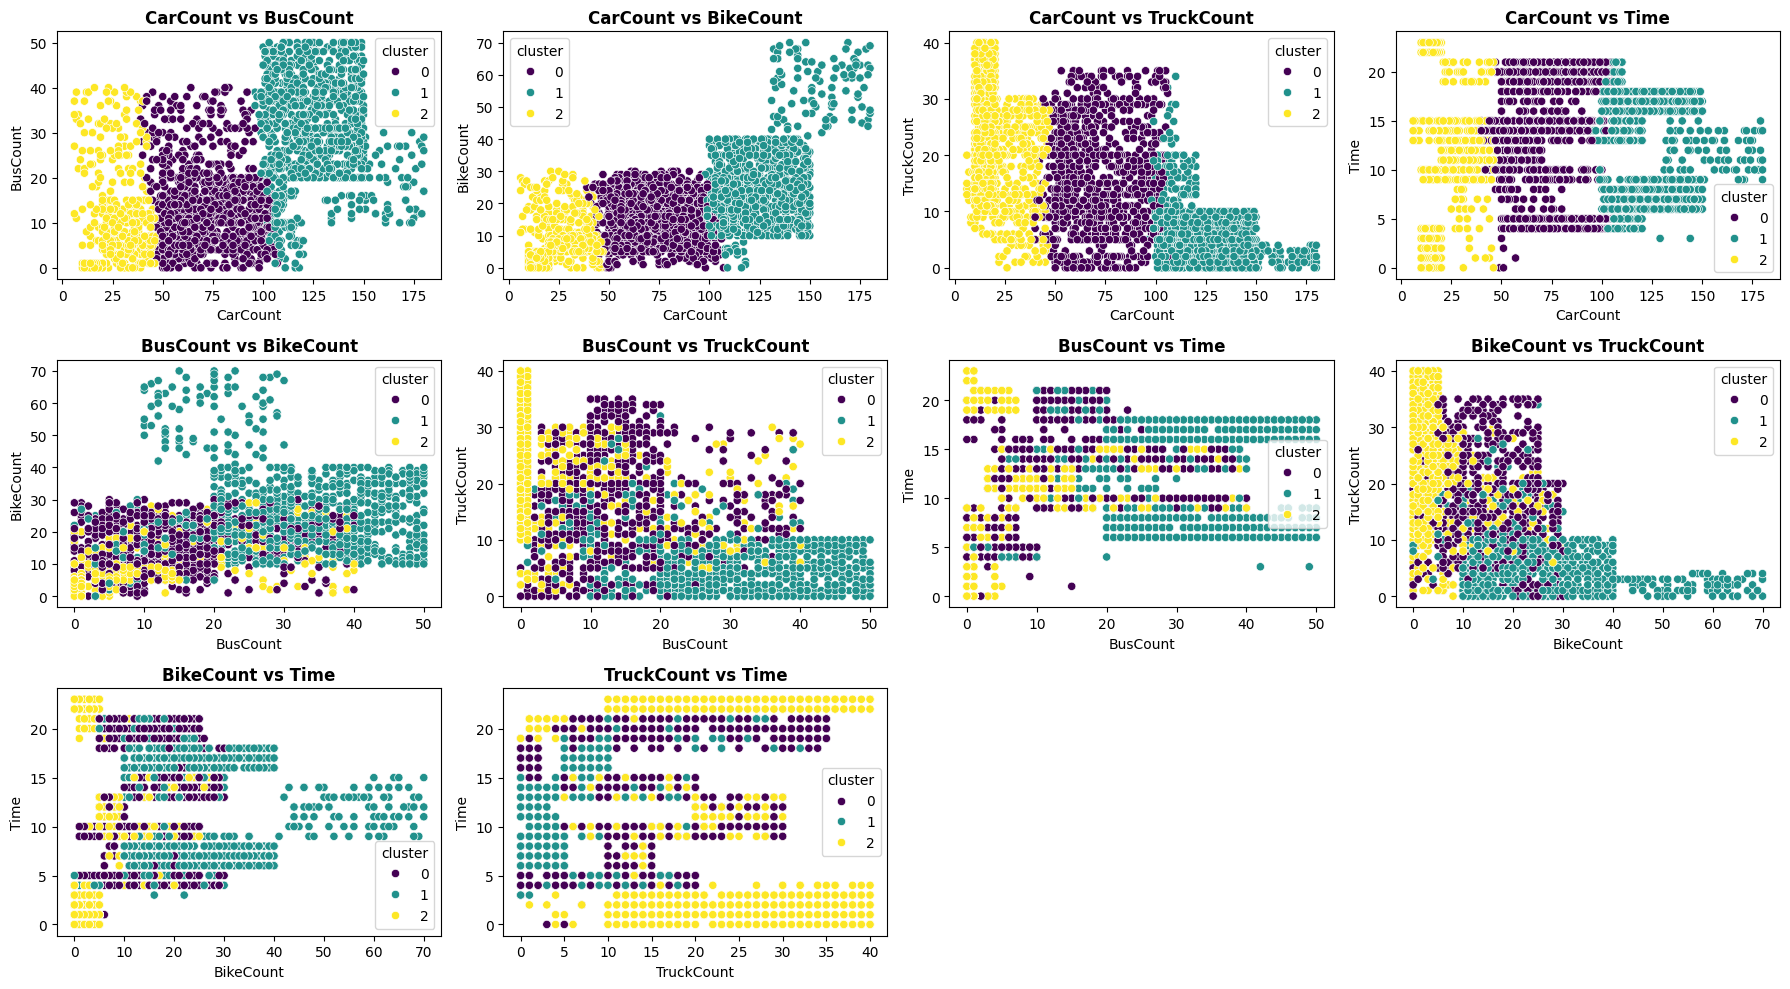

In [36]:
cols_already_used = []
cols_to_use = [col for col in df_cl.columns if col != 'cluster']
i = 0

plt.figure(figsize=(18, 10))
for col in cols_to_use:
  cols_already_used.append(col)
  for column in cols_to_use:
    if column in cols_already_used:
      continue
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df_cl[col], y=df_cl[column], hue=df_cl['cluster'], palette='viridis')
    plt.title(f'{col} vs {column}', fontsize=12, fontweight='bold')
    i+=1
plt.tight_layout()
plt.show()

##**2. Data Distribution of Each Clusters**
---

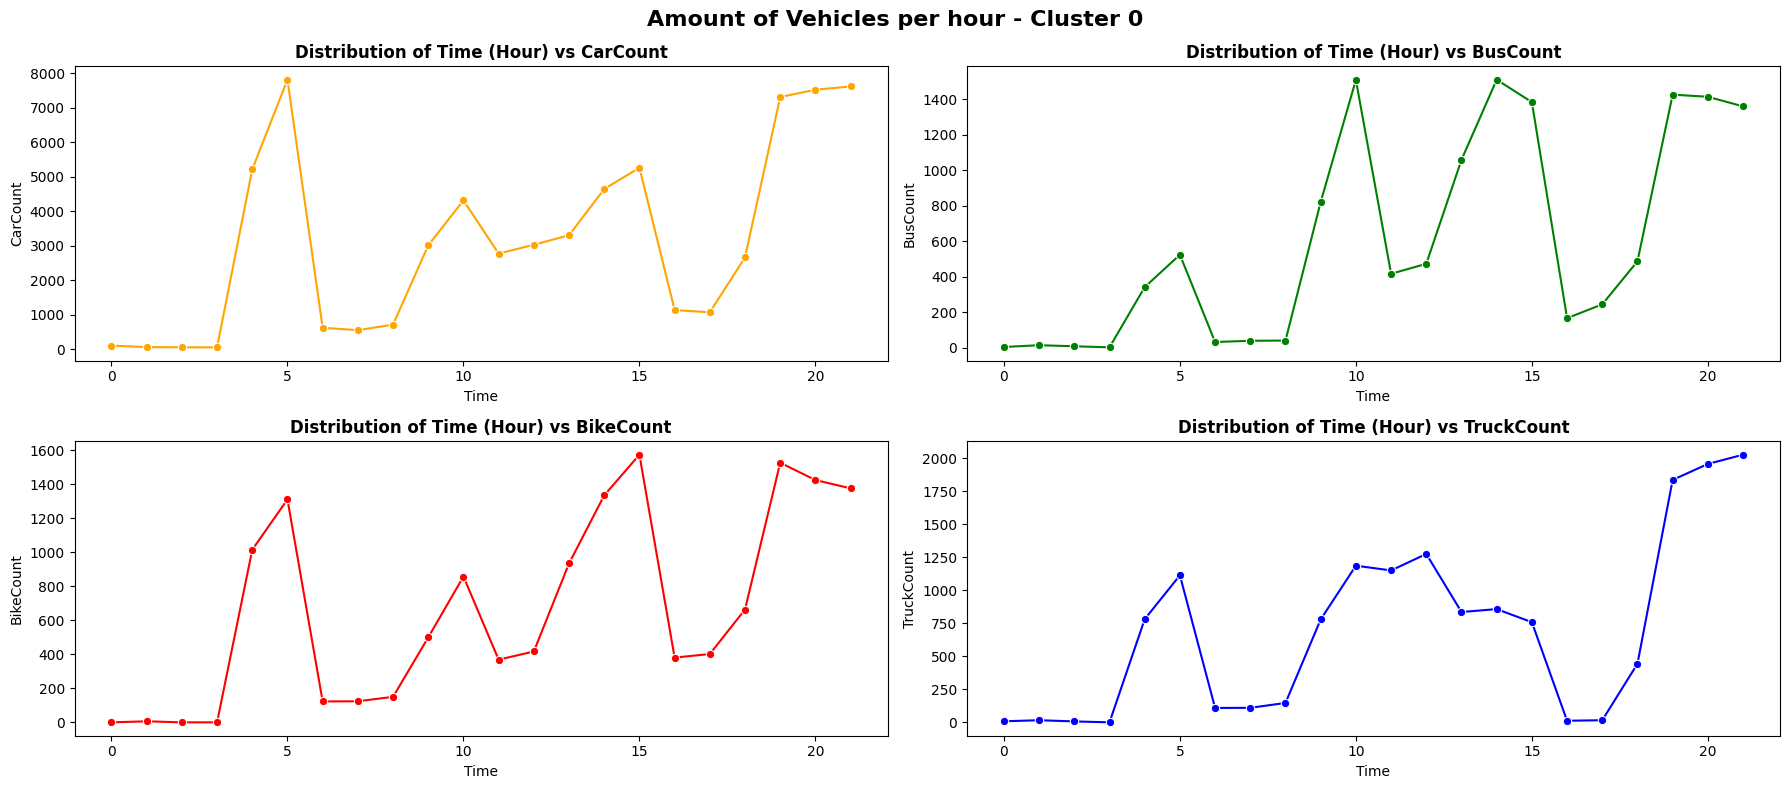

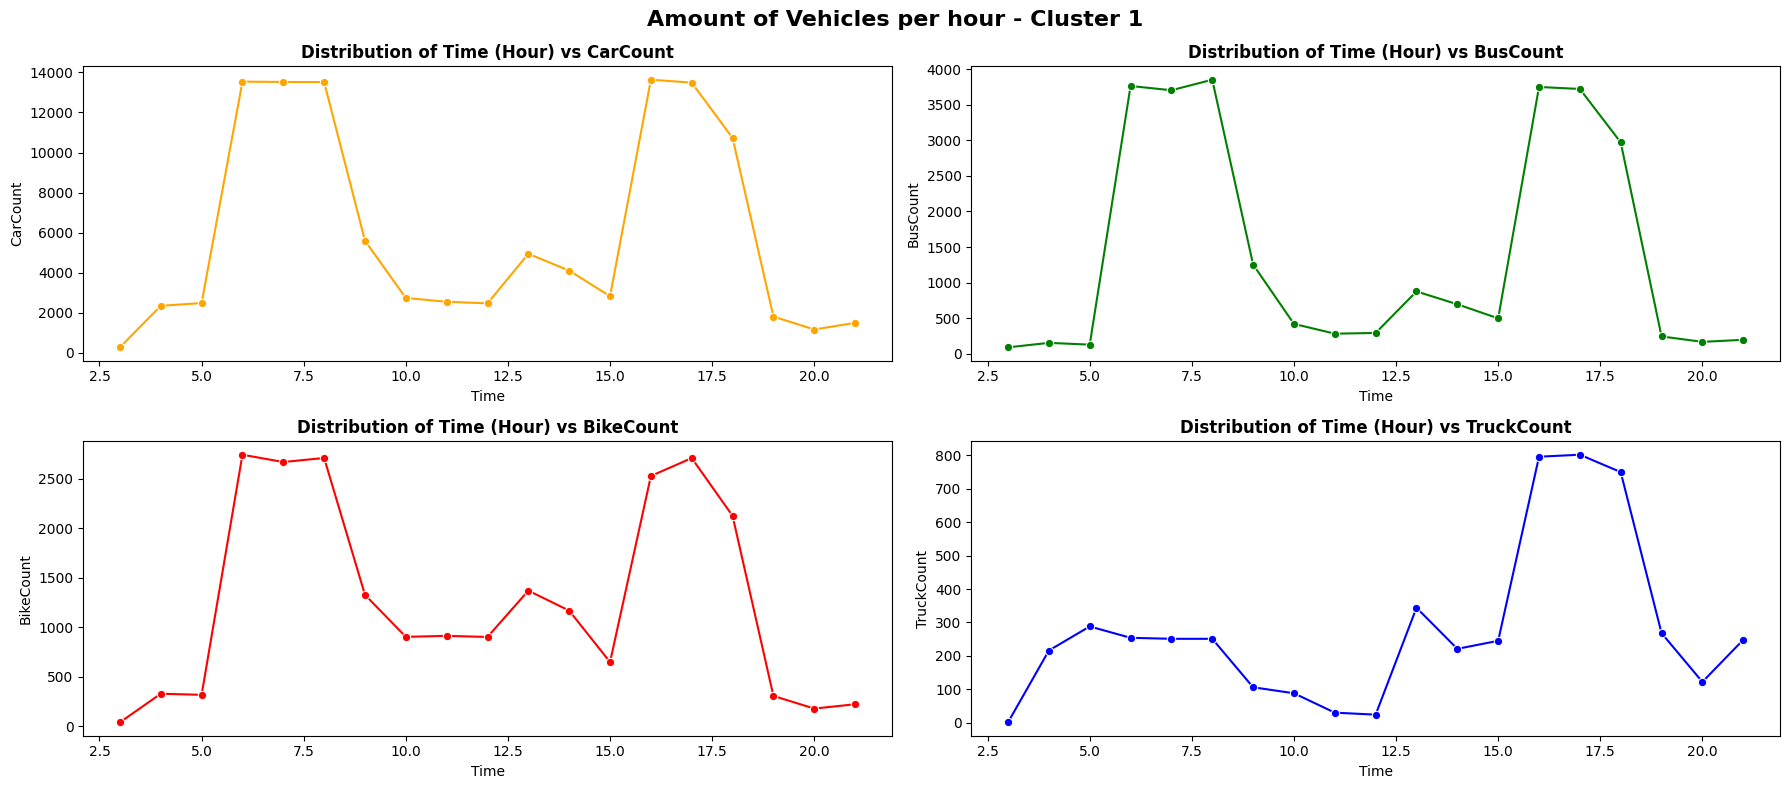

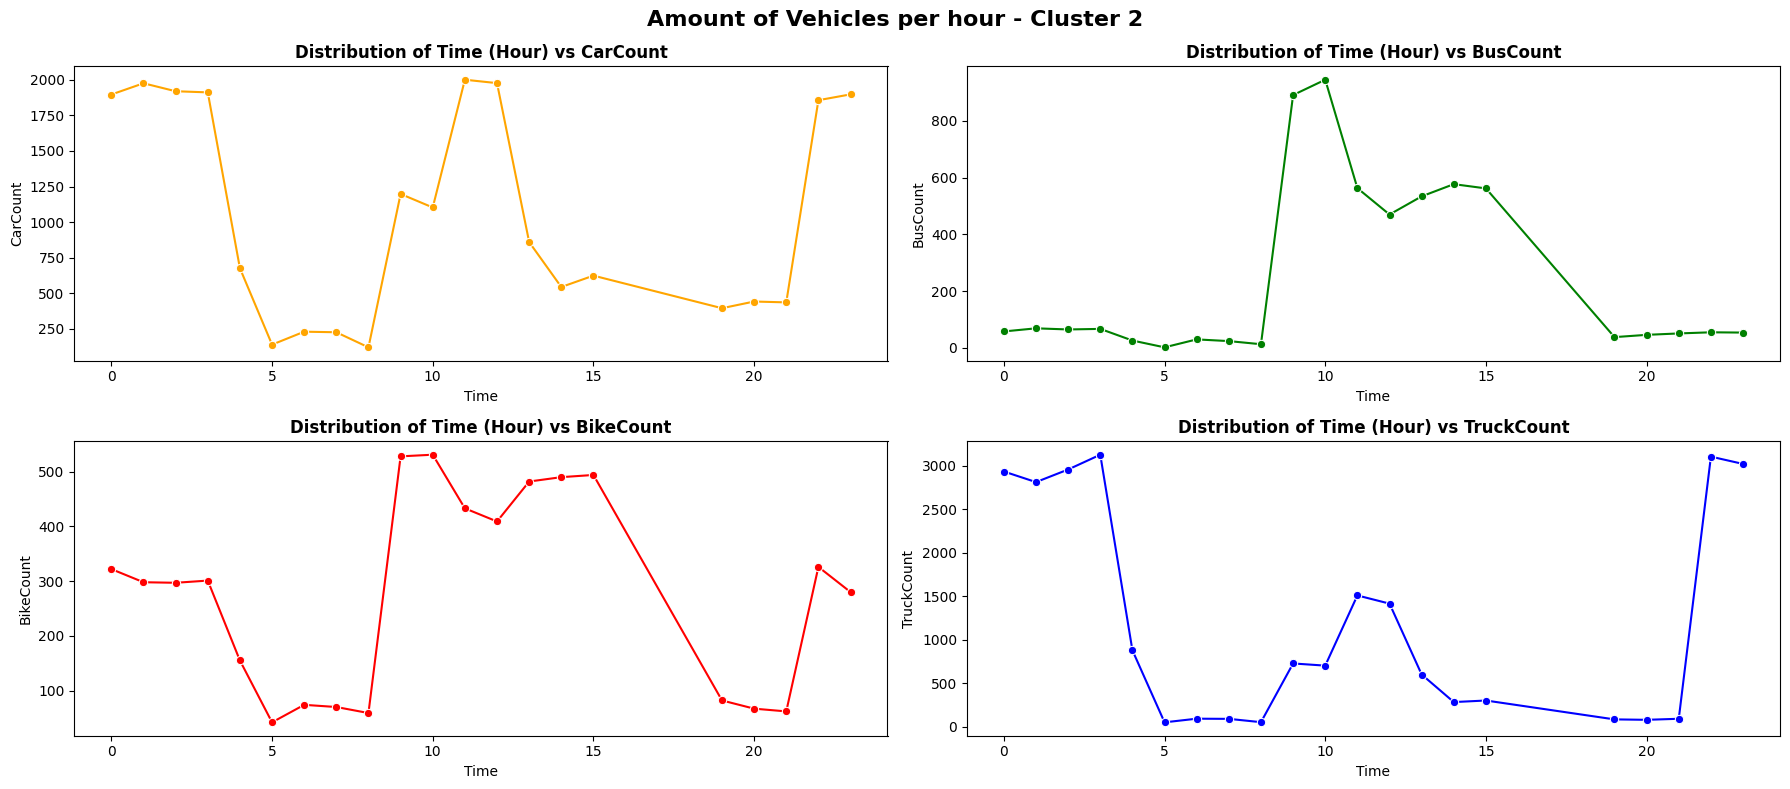

In [37]:
colors = ['orange', 'green', 'red', 'blue']
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_2 = df[df['cluster'] == 2]
df_clusters = {
    'Cluster 0': df_cluster_0,
    'Cluster 1': df_cluster_1,
    'Cluster 2': df_cluster_2
}

for data in df_clusters:
  df_cluster = df_clusters[data]
  df_cl_agg = df_cluster.groupby(by='Time').agg({
      'CarCount': 'sum',
      'BusCount': 'sum',
      'BikeCount': 'sum',
      'TruckCount': 'sum'
  })

  plt.figure(figsize=(18, 8))
  for i, col in enumerate(df_cl_agg.columns):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x=df_cl_agg.index, y=df_cl_agg[col], marker='o', color=colors[i])
    plt.title(f'Distribution of Time (Hour) vs {col}', fontsize=12, fontweight='bold')
  plt.suptitle(f'Amount of Vehicles per hour - {data}', fontsize=16, fontweight='bold')
  plt.tight_layout()
  plt.show()
  print(' ')

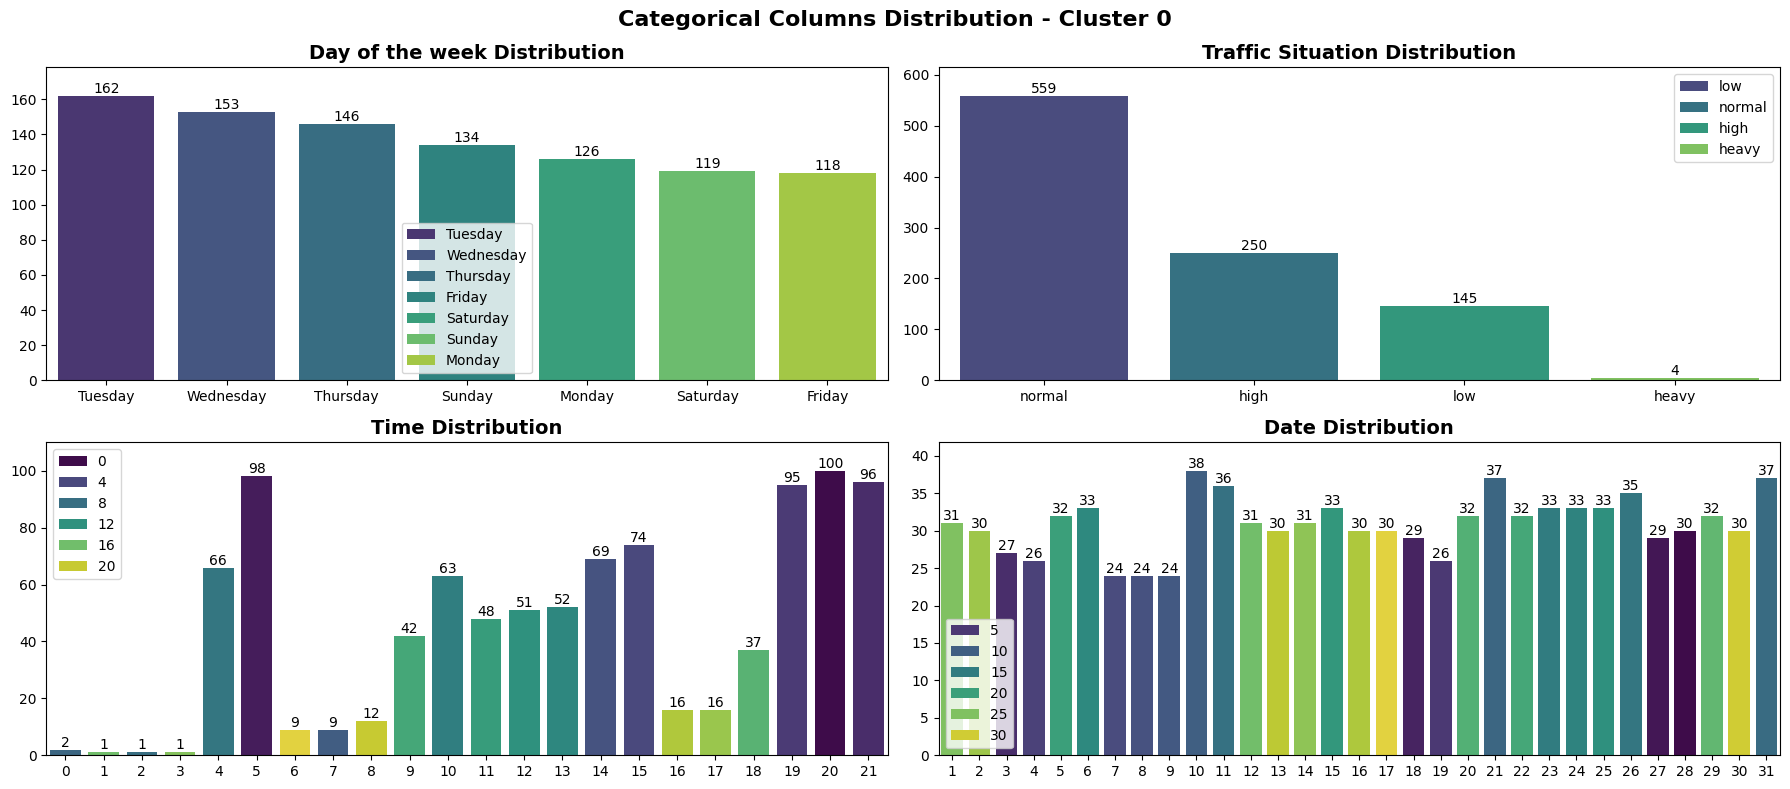

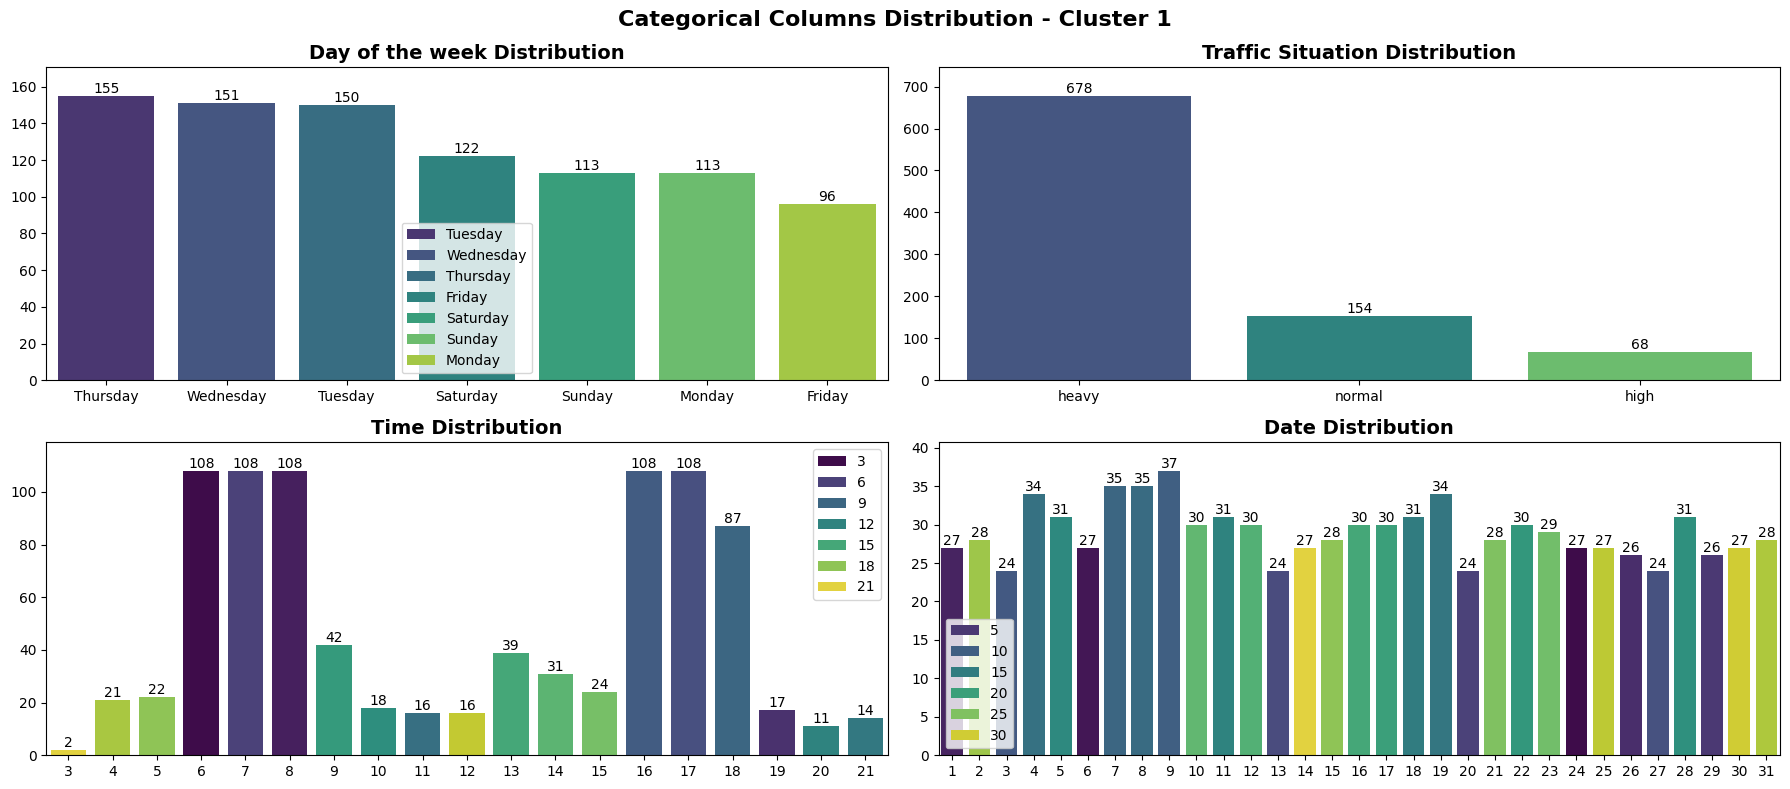

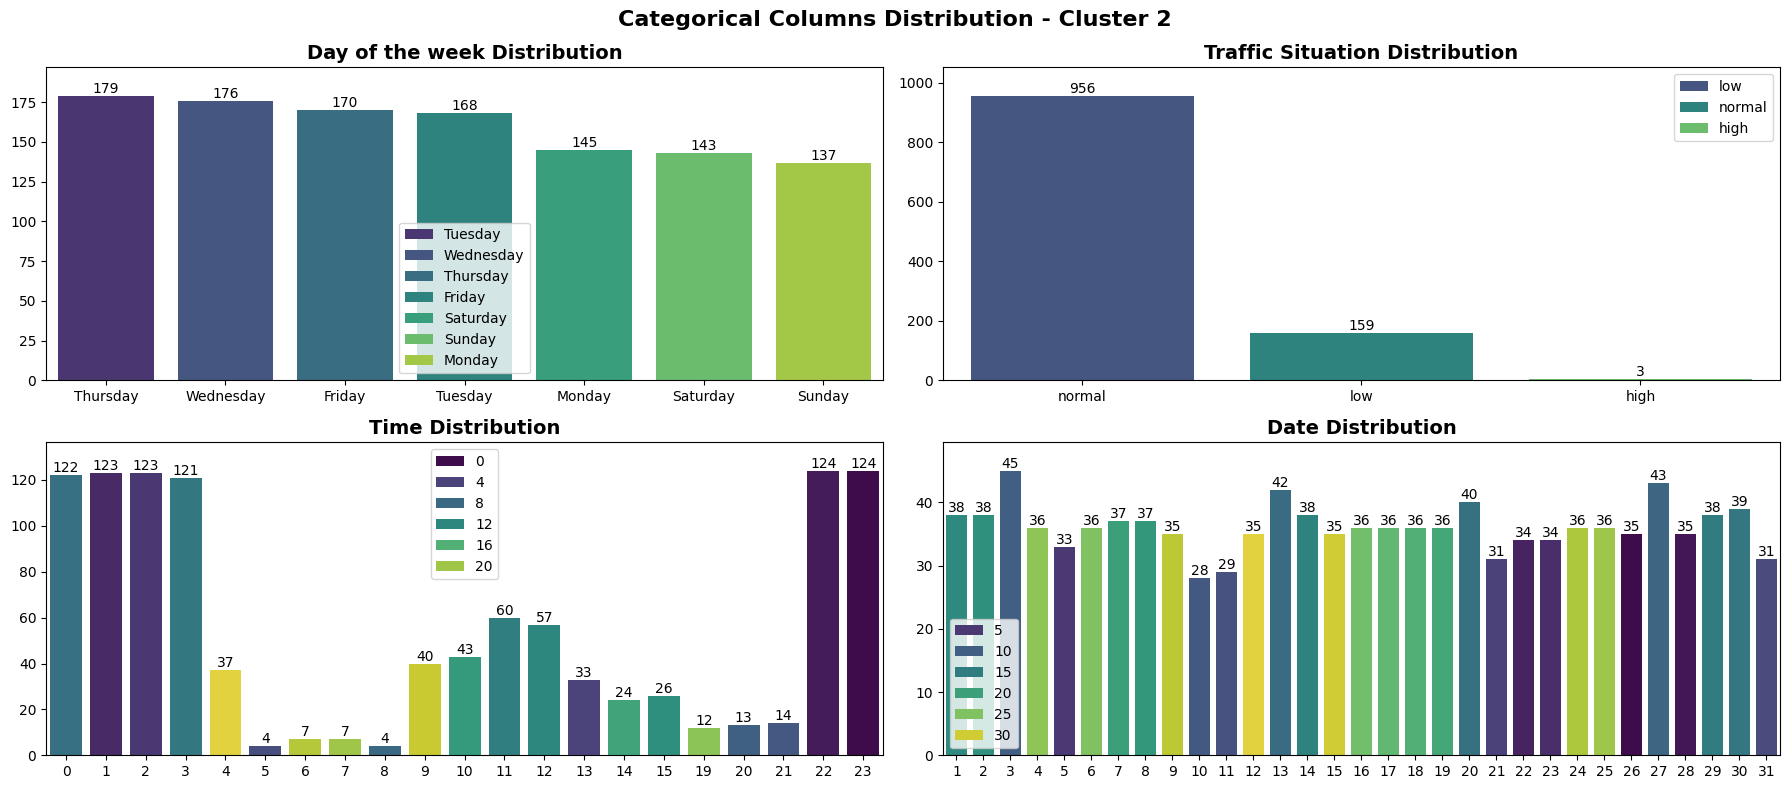

In [38]:
cols = ['Day of the week', 'Traffic Situation', 'Time', 'Date']
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_2 = df[df['cluster'] == 2]
df_clusters = {
    'Cluster 0': df_cluster_0,
    'Cluster 1': df_cluster_1,
    'Cluster 2': df_cluster_2
}

for data in df_clusters:
  df_cluster = df_clusters[data]

  plt.figure(figsize=(18,8))
  for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    counts = df_cluster[col].value_counts()
    ax = sns.barplot(x=counts.index.tolist(), y=counts.values.tolist(), hue=df_cluster[col].unique(), palette='viridis')
    for values in ax.containers:
      label = [val for val in values]
      ax.bar_label(values, label=label, label_type='edge')
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')
    plt.ylim(ymax=counts.max() + (counts.max()/10))
  plt.suptitle(f'Categorical Columns Distribution - {data}', fontsize=16, fontweight='bold')
  plt.tight_layout()
  plt.show()
  print()

#**Conclusion**
---
The results of the classification model created in this project have yielded satisfactory results, with precision, recall, and f1 scores being high. The best performing model mwoul be the Random Forest Classifier, whose precision, recall, accuracy, and f1 scores are higher than 90%. This proves that the pattern found on this dataset is representative of the differences between low, normal, high, and heavy traffic.

On the other hand, the clustering results are somewhat less conclusive, though significant insights could still be found:
1. **Cluster 0**: In this cluster, the dominant **traffic situation is normal, with a small number of low and high traffic situations**. The data of this cluster is also distributed almost evenly across many hours of the dat. This shows that the data in this cluster **shows the typical day to day traffic situation**, and as such cloud be classed as the 'normal' condition. Due to this, similar to cluster 2, data in this cluster is ***also of low concern***.
2. **Cluster 1**: In this cluster, **cars are the dominant vehicles that appeared**, and has a significant number (more than 50%) of **heavy traffic situations**. This is also illustrated by the **high number of vehicles** on this cluster. Lastly, from this cluster it could be found that **heavy traffic can be found at specific hours of the day, like from 06:00 to 08:00 and from 16:00 to 18:00**. This shows that the traffic situation of this cluster is mostly congested, and as such, ***should have the highest urgency to be handled***.
3. **Cluster 2**: This cluster is comprised of data with **normal or low traffic congestion**, and this is illustrated by the overall **low number of vehicles** across all vehicle categories. Also, the data of this cluster are mostly at **early and late hours of the day**, showing that the traffic activity is mostly low to normal during this time of the day. This shows that the ***traffic situation at this cluster is of the lowest-concern***.

Based on these results, in could be concluded that worse traffic conditions tend to be characterized by a high number of vehicles. These traffic congestions tend to have a pattern, happening during rush hours (in the morning, from 06:00-08:00 and in the afternoon, from 16:00-18:00). The classification model was able to detect these congestions fairly well, and the clustering results were able to identify data where the traffic situation is particularly severe, and these clusters could be used to determine specific treatments or actions that should be done in order to deal with traffic conditions more appropriately.

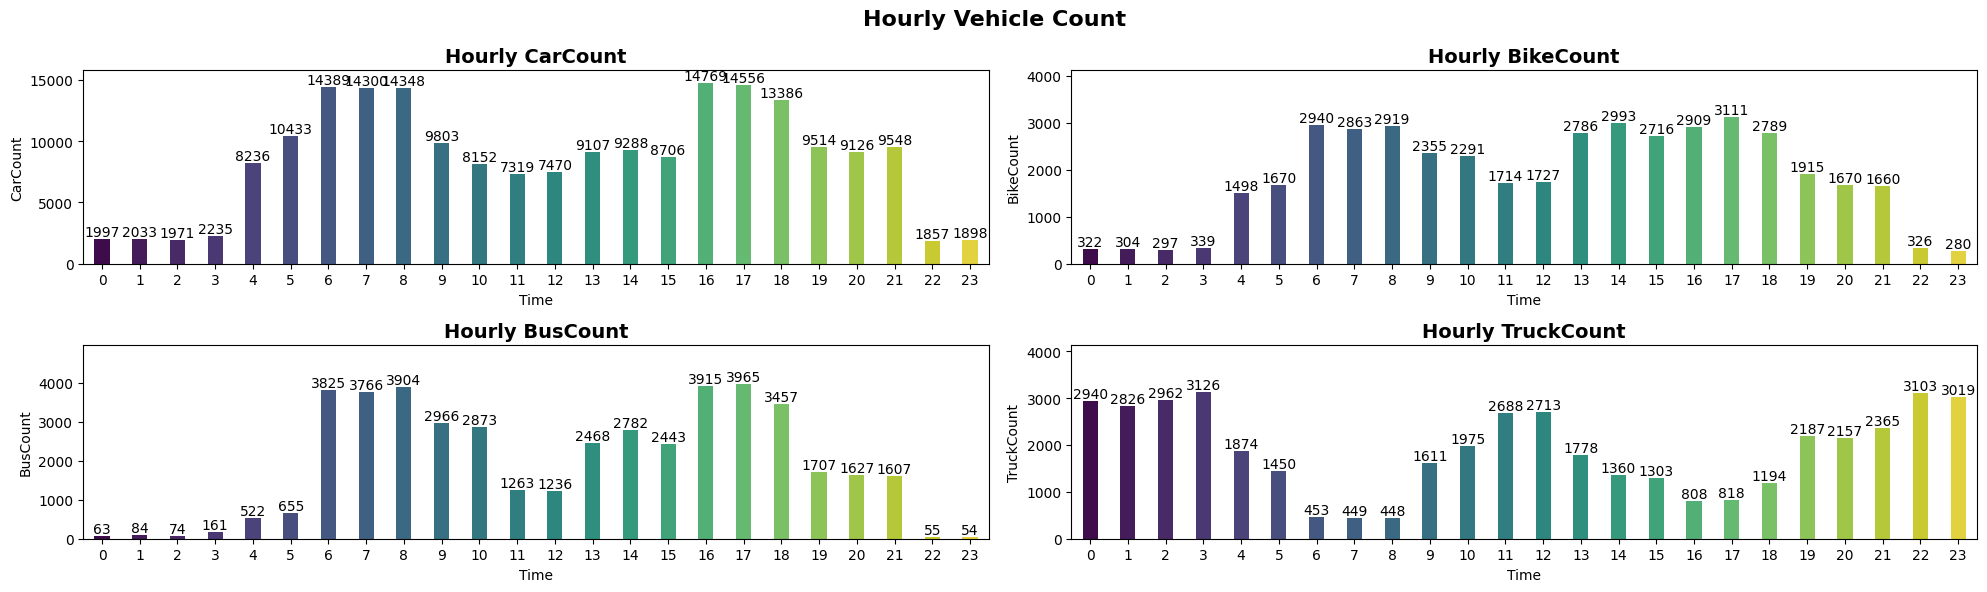

In [39]:
df_hourly = df.groupby(by='Time').agg({
  'CarCount': 'sum',
  'BikeCount': 'sum',
  'BusCount': 'sum',
  'TruckCount': 'sum'
})

plt.figure(figsize=(20, 6))
for i, col in enumerate(df_hourly.columns):
  plt.subplot(2, 2, i+1)
  ax = sns.barplot(x=df_hourly.index, y=df_hourly[col], hue=df_hourly.index, palette='viridis', gap=0.5, legend=False)
  for value in ax.containers:
    label=[val.get_height() for val in value]
    ax.bar_label(value, label=label, label_type='edge')
  plt.title(f'Hourly {col}', fontsize=14, fontweight='bold')
  plt.ylim(ymax=df_hourly[col].max() + 1000)
plt.suptitle(f'Hourly Vehicle Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

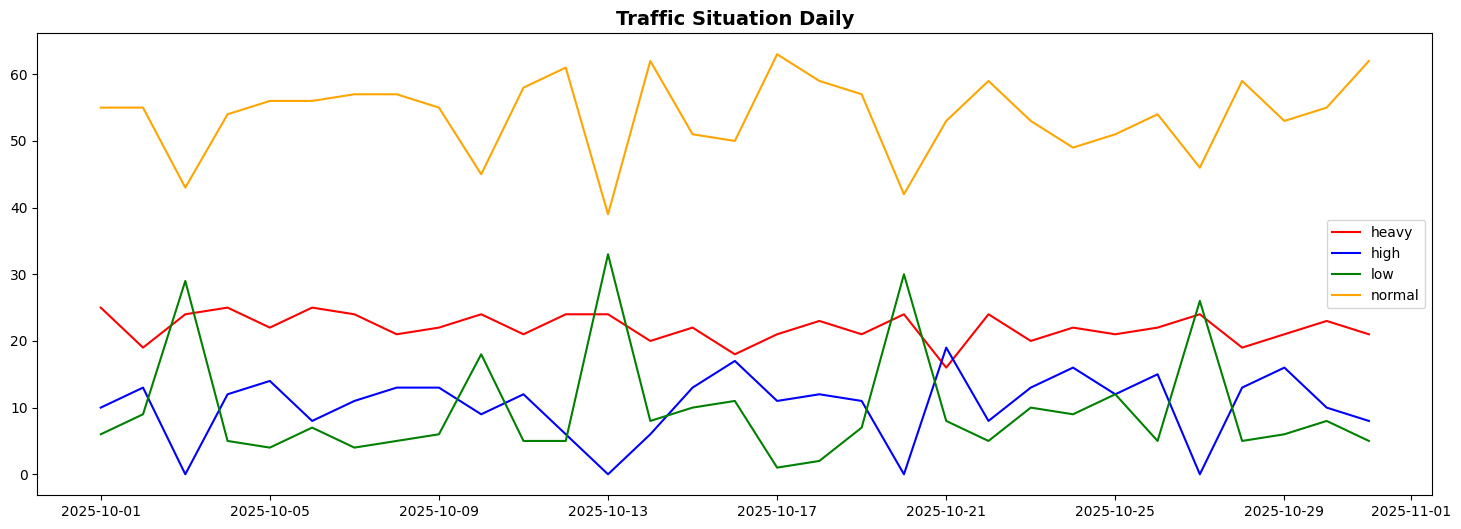

In [40]:
dates = []
for val in df['Date']:
  dates.append(f'2025/10/{val}')

df_new_2 = df.copy()
df_new_2['Date_Only'] = dates
df_new_2['Date_Only'] = pd.to_datetime(df_new_2['Date_Only'])

df_new_2_agg = df_new_2.pivot_table(columns='Traffic Situation', index='Date_Only', values='Date_agg', aggfunc='count')
df_new_2_agg.fillna(0, inplace=True)

color = ['red', 'blue', 'green', 'orange']
plt.figure(figsize=(18, 6))
for i, col in enumerate(df_new_2_agg.columns):
  plt.plot(df_new_2_agg.index.tolist(), df_new_2_agg[col], color=color[i], label=col)
plt.title('Traffic Situation Daily', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

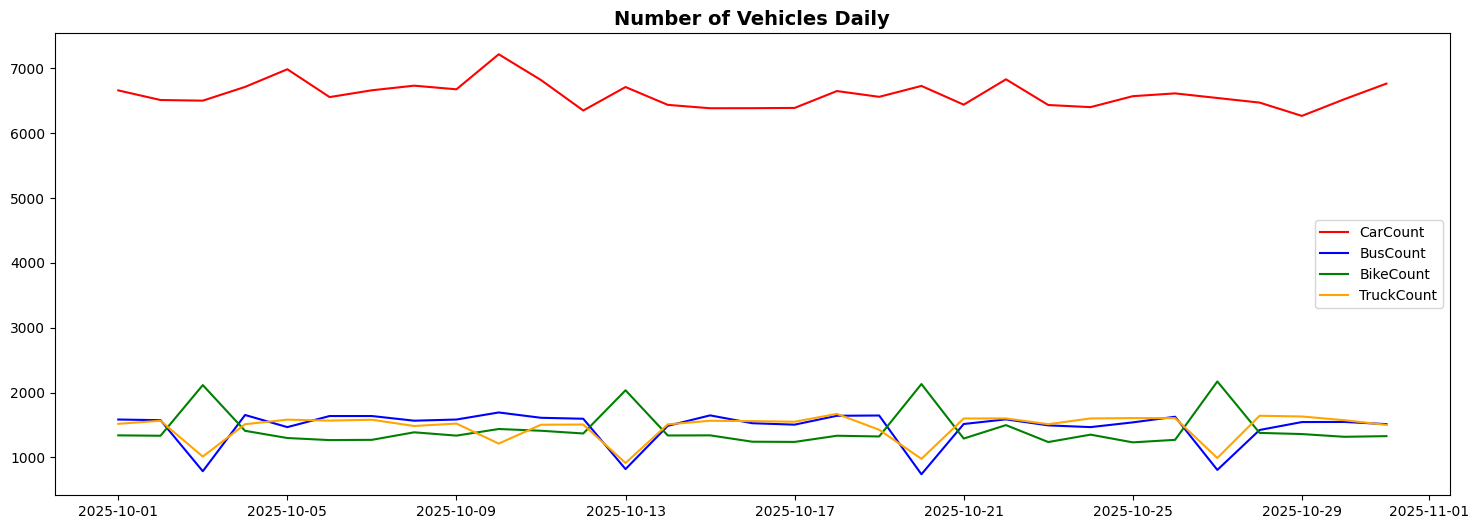

In [41]:
df_new_2_agg2 = df_new_2.groupby(by='Date_Only').agg({
    'CarCount': 'sum',
    'BusCount': 'sum',
    'BikeCount': 'sum',
    'TruckCount': 'sum',
})

color = ['red', 'blue', 'green', 'orange']
plt.figure(figsize=(18, 6))
for i, col in enumerate(df_new_2_agg2.columns):
  plt.plot(df_new_2_agg2.index.tolist(), df_new_2_agg2[col], color=color[i], label=col)
plt.title('Number of Vehicles Daily', fontsize=14, fontweight='bold')
plt.legend()
plt.show()